In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Mukta\OneDrive\Desktop\Data_Science\Association Rules\myphonedata.csv")
df.head()

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1


In [5]:
#already encoded in format suitable for apriori
#apply apriori algorithm
from mlxtend.frequent_patterns import apriori,association_rules
frequent_itemsets=apriori(df,min_support=0.2,use_colnames=True)
frequent_itemsets

C:\Users\Mukta\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.545455,(red)
1,0.636364,(white)
2,0.545455,(blue)
3,0.363636,"(red, white)"
4,0.363636,"(red, blue)"
5,0.363636,"(blue, white)"


In [7]:
#association rules
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909,0.100
1,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606,0.125
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636,0.400
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636,0.400
4,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909,0.100
5,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606,0.125


C:\Users\Mukta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Mukta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\Mukta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


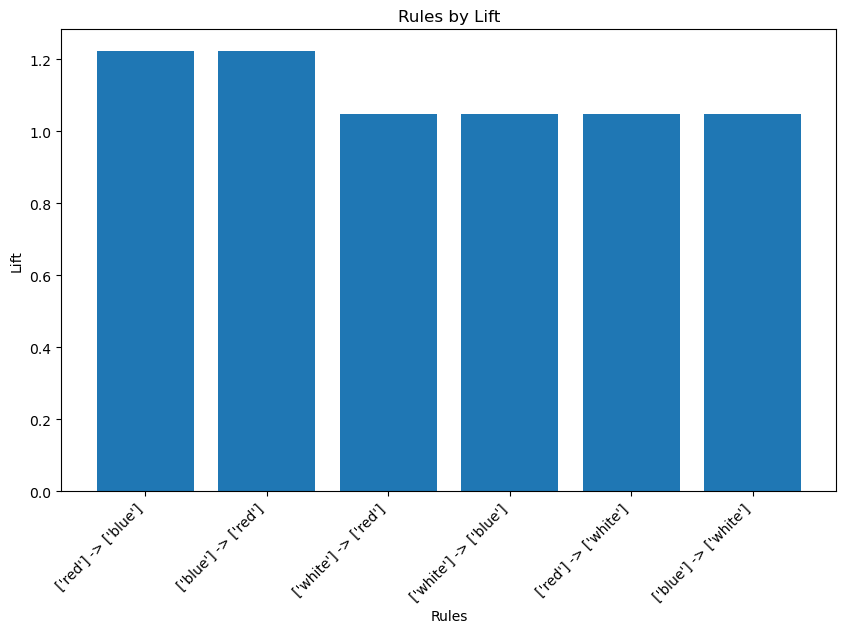

In [9]:
#Sort rules by lift in descending order
rules_sorted_by_lift = rules.sort_values('lift', ascending=False)
#plot lift for the 5 association rules
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(rules_sorted_by_lift)), rules_sorted_by_lift['lift'])
plt.xticks(range(len(rules_sorted_by_lift)), rules_sorted_by_lift.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Lift')
plt.title('Rules by Lift')
plt.show()

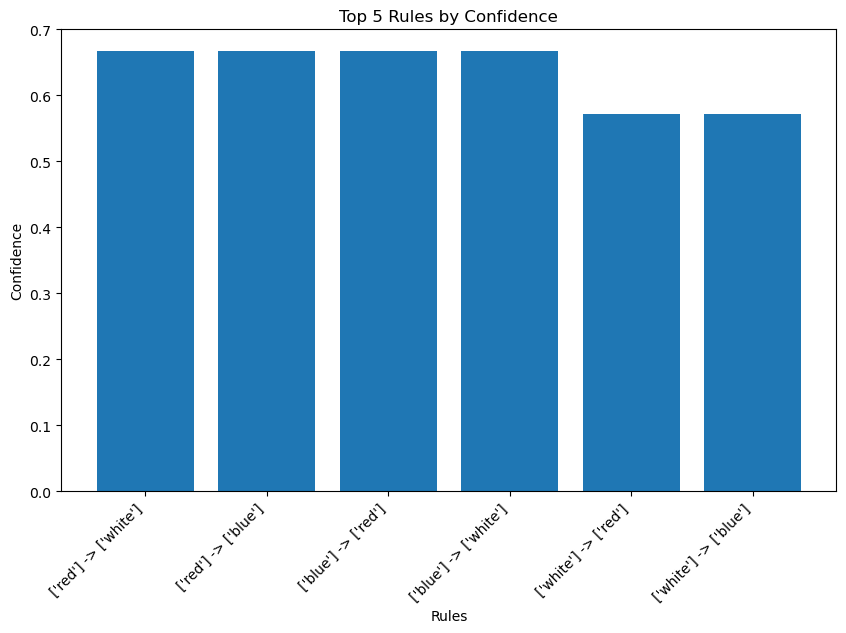

In [13]:
#Sort rules by confidence in descending order
rules_sorted_by_confidence = rules.sort_values('confidence', ascending=False)
#bar chart for confidence
plt.figure(figsize=(10, 6))
plt.bar(range(len(rules_sorted_by_confidence)), rules_sorted_by_confidence['confidence'])
plt.xticks(range(len(rules_sorted_by_confidence)), rules_sorted_by_confidence.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1), rotation=45, ha='right')
plt.xlabel('Rules')
plt.ylabel('Confidence')
plt.title('Top 5 Rules by Confidence')
plt.show()